# Which programming language are you using in 2022?

This analysis answers the following questions:
* Which programming languages are popular in 2022?
* Who is already using the most popular languages from 2022?
* Do programming languages start as a hobby language and get used by professionals later?

To answer these questions, data from the [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey) is used, including historical data.

## Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import stats


## Loading data
In the CSV's we can also see that the 2011-2015 data have the answer options on the second line. Therefore, skip the first line for these years.

In [0]:
# Load all data and store them in a single hash indexed by year.
df = {}
df[2011] = pd.read_csv(root_path + '/2011.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2012] = pd.read_csv(root_path + '/2012.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2013] = pd.read_csv(root_path + '/2013.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2014] = pd.read_csv(root_path + '/2014.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2015] = pd.read_csv(root_path + '/2015.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2016] = pd.read_csv(root_path + '/2016.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df[2017] = pd.read_csv(root_path + '/2017.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df[2018] = pd.read_csv(root_path + '/2018.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df[2019] = pd.read_csv(root_path + '/2019.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=r

Check which columns are in the datasets.

In [0]:
# Print the columns per year.
for i in range(2011, 2020):
    print("Year " + str(i))
    print(list(df[i].columns))

Year 2011
['Response', 'Response.1', 'Response.2', 'Response.3', 'Response.4', 'Response.5', 'Response.6', 'Response.7', 'Influencer', 'Recommender', 'Approver', 'Purchaser', 'Check Writer', 'No Involvement', "I'm a Seller", 'Hardware', 'Servers', 'Software', 'User Equipment: Monitors, PCs, Laptops', 'Consultants', 'Other', '<$10,000', '$10,001 - $25,000', '$25,001 - $40,000', '$41,000 - $75,000', '$75,001 - $100,000', '$100,001 - $150,000', '>$150,000', "Don't know", 'Response.8', 'Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl', 'None', 'other (please specify)', 'Response.9', 'Response.10', 'Response.11', 'iPhone', 'Android', 'Blackberry', 'Other Smart Phone', 'Regular Mobile Phone', 'Kindle', 'Nook', 'Blu-Ray', 'HDTV', 'AppleTV', 'iPad', 'Other netbook', 'PS3', 'Xbox', 'Wii', 'Other gaming system', 'other (please specify).1', 'Response.12', 'Response.13']
Year 2012
['Response', 'Response.1', 'Response.2', 'Response.3', 'Response.4', 'Response.5',

# Which programming languages are popular in 2022?

The downloads contain a description of the survey. The survey questions are different each year, but each year asks for the languages used. The data can be aggregated per year and then be used to find a function that can predict its usage for a given year.

## Data preparation


The years 2011-2015 have a column per programming language. In 2015, the names are prepended by the string "Current Lang & Tech: ". From 2016 onwards, the languages are contained in a single cell, separated by a semicolon (and sometimes a space). The names for these columns are different each year.

In [0]:
# Save the relevant columns, used in later code.
columns = {}
columns[2011] = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl']
columns[2012] = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Objective-C', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl']
columns[2013] = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL', 'Node.js.1', 'Haskell', 'CoffeeScript', 'Dart', 'TypeScript', 'C++11', 'F#']
columns[2014] = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL', 'Node.js.1', 'Haskell', 'CoffeeScript', 'Dart', 'C++11', 'Redis', 'MongoDB', 'F#', 'Go']
columns[2015] = ['Current Lang & Tech: C', 'Current Lang & Tech: C++', 'Current Lang & Tech: C++11', 'Current Lang & Tech: C#', 'Current Lang & Tech: CoffeeScript', 'Current Lang & Tech: Clojure', 'Current Lang & Tech: Dart', 'Current Lang & Tech: F#', 'Current Lang & Tech: Go', 'Current Lang & Tech: Haskell', 'Current Lang & Tech: Java', 'Current Lang & Tech: JavaScript', 'Current Lang & Tech: Matlab', 'Current Lang & Tech: Node.js', 'Current Lang & Tech: Objective-C', 'Current Lang & Tech: Perl', 'Current Lang & Tech: PHP', 'Current Lang & Tech: Python', 'Current Lang & Tech: R', 'Current Lang & Tech: Ruby', 'Current Lang & Tech: Rust', 'Current Lang & Tech: Scala', 'Current Lang & Tech: SQL', 'Current Lang & Tech: SQL Server', 'Current Lang & Tech: Swift', 'Current Lang & Tech: Visual Basic']
columns[2016] = ['tech_do'] # "; " separated
columns[2017] = ['HaveWorkedLanguage'] # "; " separated
columns[2018] = ['LanguageWorkedWith'] # ";" separated
columns[2019] = ['LanguageWorkedWith'] # ";" separated

Rows may contain only NA's in the relevant columns. This can be because the survey is not filled in completely, or because the respondent is not a developer at all. In both cases, we want to drop these rows.

In [0]:
for year in range(2011, 2020):
  before = df[year].shape[0]
  df[year] = df[year].dropna(subset=columns[year], how='all').reset_index(drop=True)
  after = df[year].shape[0]
  print('Year {}: {} to {} rows'.format(year, before, after))

Year 2011: 2813 to 2536 rows
Year 2012: 6243 to 5464 rows
Year 2013: 9742 to 7986 rows
Year 2014: 7643 to 6476 rows
Year 2015: 26086 to 21774 rows
Year 2016: 56030 to 49025 rows
Year 2017: 51392 to 36625 rows
Year 2018: 98855 to 78334 rows
Year 2019: 88883 to 87569 rows


To compare the programming language usage over the years, we want to aggregate the usage per year first. Define functions for building a hash with the usage per language, for a single year.

Start with a function for the years where all languages are stored in a single column. This function should work on the years 2016-2019, which is using different namings for their columns.

In [0]:
def get_counts_multiple(df):
  counts = {}
  sep = ";"
  for i in range(0, df.shape[0]):
    if 'tech_do' in df.columns:
      cell = df.tech_do[i]
    if 'HaveWorkedLanguage' in df.columns:
      cell = df.HaveWorkedLanguage[i]
    if 'LanguageWorkedWith' in df.columns:
      cell = df.LanguageWorkedWith[i]
    cell = str(cell)
    if cell == 'nan':
      continue;
    for value in str(cell).split(';'):
      value = value.strip()
      if value in counts:
        counts[value] += 1
      else:
        counts[value] = 1
  for i in counts:
    counts[i] /= df.shape[0]
  return counts;

# Print results for a single language to check results.
for i in range(2016, 2020):
  print('Year {}: {}'.format(i, get_counts_multiple(df[i])['C++']))

Year 2016: 0.19559408465068842
Year 2017: 0.22266211604095562
Year 2018: 0.25368294737917124
Year 2019: 0.2343751784307232


Subsequently, we have to define a function to get the counts for earlier years. These have a separate column per language. Since we are only interested in popular languages in the future, we only consider languages that are still in use. That is, languages included in the 2019 survey. These columns include HTML/CSS, which is not a programming language, and "Other(s):". We will not use them because we are only interested in popular programming languages.

In [0]:
# Save a list of the considered languages.
languages = ['Java', 'JavaScript', 'Python', 'C++', 'C', 'C#', 'SQL', 'VBA', 'R', 'Ruby', 'Rust', 'TypeScript', 'WebAssembly', 'Go', 'PHP', 'Assembly', 'Kotlin', 'Swift', 'Objective-C', 'Elixir', 'Erlang', 'Clojure', 'F#', 'Scala', 'Dart']

Define functions to get counts for 2011-2015 and a utility function that works for all years.

In [0]:
def get_counts_columns(df, columns):
  counts = {}
  for col in columns:
    if col in df.columns:
      counts[col] = 1 - (df[col].isna().sum() / df.shape[0])
    if 'Current Lang & Tech: ' + col in df.columns:
      counts[col] = 1 - (df['Current Lang & Tech: ' + col].isna().sum() / df.shape[0])
  return counts;

def get_counts(year):
  if (year < 2016):
    counts = get_counts_columns(df[year], languages)
  else:
    counts = get_counts_multiple(df[year])
  return counts

# Print results for a single language to check results.
for i in range(2011, 2020):
  print('Year {}: {}'.format(i, get_counts(i)['C++']))


Year 2011: 0.29179810725552047
Year 2012: 0.2792825768667643
Year 2013: 0.2123716503881793
Year 2014: 0.2189623224212477
Year 2015: 0.2080003674106733
Year 2016: 0.19559408465068842
Year 2017: 0.22266211604095562
Year 2018: 0.25368294737917124
Year 2019: 0.2343751784307232


In [0]:
# Print a single year for sanity check.
get_counts(2017)

{'Assembly': 0.04977474402730375,
 'C': 0.19041638225255972,
 'C#': 0.34064163822525595,
 'C++': 0.22266211604095562,
 'Clojure': 0.010675767918088738,
 'CoffeeScript': 0.032546075085324234,
 'Common Lisp': 0.007453924914675768,
 'Dart': 0.003959044368600682,
 'Elixir': 0.01037542662116041,
 'Erlang': 0.007672354948805461,
 'F#': 0.012477815699658702,
 'Go': 0.042511945392491465,
 'Groovy': 0.032573378839590446,
 'Hack': 0.0029215017064846416,
 'Haskell': 0.017720136518771332,
 'Java': 0.39655972696245734,
 'JavaScript': 0.6245733788395904,
 'Julia': 0.0037679180887372015,
 'Lua': 0.028368600682593857,
 'Matlab': 0.04283959044368601,
 'Objective-C': 0.06413651877133106,
 'PHP': 0.2809556313993174,
 'Perl': 0.04327645051194539,
 'Python': 0.3195631399317406,
 'R': 0.04461433447098976,
 'Ruby': 0.09075767918088737,
 'Rust': 0.011358361774744027,
 'SQL': 0.5120546075085324,
 'Scala': 0.03574061433447099,
 'Smalltalk': 0.008928327645051195,
 'Swift': 0.06465529010238907,
 'TypeScript': 0.0

Collect all results in a single dataframe.

In [0]:
usage = pd.DataFrame(index=range(2011, 2019 + 1), columns=languages, dtype=np.float)
usage = usage.fillna(0)

for year in range(2011, 2020):
  counts = get_counts(year)
  for lang in languages:
    if lang in counts:
      usage[lang][year] = counts[lang]

usage

,Java,JavaScript,Python,C++,C,C#,SQL,VBA,R,Ruby,Rust,TypeScript,WebAssembly,Go,PHP,Assembly,Kotlin,Swift,Objective-C,Elixir,Erlang,Clojure,F#,Scala,Dart
2011,0.339511,0.559543,0.226735,0.291798,0.292192,0.533123,0.636041,0.000000,0.000000,0.112382,0.000000,0.000000,0.000000,0.000000,0.310726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.429722,0.572291,0.221449,0.279283,0.271596,0.451684,0.602855,0.000000,0.000000,0.105600,0.000000,0.000000,0.000000,0.000000,0.352306,0.000000,0.000000,0.000000,0.110725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013,0.378162,0.592913,0.235412,0.212372,0.179815,0.379038,0.575131,0.000000,0.000000,0.099424,0.000000,0.077010,0.000000,0.000000,0.291009,0.000000,0.000000,0.000000,0.119584,0.000000,0.000000,0.000000,0.076133,0.000000,0.051465
2014,0.382798,0.584157,0.227455,0.218962,0.181285,0.367202,0.535361,0.000000,0.000000,0.091569,0.000000,0.000000,0.000000,0.096665,0.264052,0.000000,0.000000,0.000000,0.104231,0.000000,0.000000,0.000000,0.076590,0.000000,0.053274
2015,0.377469,0.549371,0.240562,0.208000,0.165886,0.319142,0.433499,0.000000,0.034674,0.081060,0.004730,0.000000,0.000000,0.021218,0.299853,0.000000,0.000000,0.034858,0.078947,0.000000,0.000000,0.008083,0.007991,0.024708,0.005006
2016,0.365977,0.558593,0.250525,0.195594,0.156614,0.311739,0.448261,0.000000,0.033289,0.089403,0.008893,0.000000,0.000000,0.031555,0.260683,0.000000,0.000000,0.056012,0.065314,0.000000,0.000000,0.011341,0.009873,0.032677,0.004528
2017,0.396560,0.624573,0.319563,0.222662,0.190416,0.340642,0.512055,0.042976,0.044614,0.090758,0.011358,0.095235,0.000000,0.042512,0.280956,0.049775,0.000000,0.064655,0.064137,0.010375,0.007672,0.010676,0.012478,0.035741,0.003959
2018,0.453456,0.698113,0.387558,0.253683,0.230321,0.344091,0.570250,0.048638,0.061442,0.100991,0.023706,0.173947,0.000000,0.070621,0.307287,0.073531,0.044783,0.080553,0.070340,0.000000,0.011311,0.013174,0.014234,0.043659,0.000000
2019,0.410157,0.676255,0.416163,0.234375,0.205746,0.309436,0.542932,0.054597,0.057646,0.083717,0.031906,0.211525,0.011591,0.082232,0.262993,0.066610,0.064178,0.065594,0.047859,0.014389,0.008873,0.014320,0.011111,0.037787,0.019219


## Modeling

To predict the usage in the future, we want to find a function that calculates the usage in terms of the year. Linear regression can be used to find such functions. We combine this with a polynomial function to model a curve. For this, we have to decide on the degree to use. A 2nd-degree can only be a straight line or hyperbola, but a 3th-degree can have a wave that goes up, down and up again (or vice versa). This might be expected for some languages. A 4th-degree curve is likely to overfit our data. Therefore, we use a 3th-degree polynomial function.

Define a function that calculates the coëfficients for each language.

In [0]:
def fit_curves(usage, degree = 3):
  out = pd.DataFrame(index=usage.columns, columns=range(0, degree + 1))
  for col in usage.columns:
    X = list(map(lambda item : [item], usage.index))
    y = usage[col].values
    
    # Strip the first years where usage is zero.
    skip = 0
    for year in usage.index:
      if usage[col][year] == 0:
        skip += 1
      else:
        break

    X = X[skip:]
    y = y[skip:]
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression(fit_intercept = True).fit(X_poly, y)
    
    out[0][col] = poly_model.intercept_
    for i in range(1, degree + 1):
      out[i][col] = poly_model.coef_[i]

  return out

curves = fit_curves(usage, 3)
curves.head()
    

,0,1,2,3
Java,-5.05642e+06,7529.69,-3.73757,0.000618417
JavaScript,-3.92232e+06,5846.96,-2.90533,0.000481215
Python,-1.27046e+06,1902.11,-0.949255,0.000157906
C++,3.79547e+06,-5642.59,2.79621,-0.000461889
C,5.79424e+06,-8614.82,4.26946,-0.000705308


The curve is defined by the function $y = c_0x^0 + c_1x^1 + c_2x^2 + c_3x^3 = c_0 + c_1x + c_2x^2 + c_3x^3$, where $y$ is the usage, $x$ is the year and $c_n$ is the coëfficient.

The column name is the degree of the coëfficient.
For example, for Java, the curve is $-506000 + 7530x + -3.74x^2 + 0.000618x^3$ (coéfficients rounded to 3 significant figures).

Now define a function that uses this table to predict usage in a given year and add our predictions to the `curves` table.

In [0]:
def predict_year(curves, year, degrees = 3):
  colname = str(year)
  pred = curves.copy()[0]
  for i in range(1, degrees + 1):
    pred += curves[i] * year ** i
  # Values below 0 or above 1 don't make sense in our context.
  pred = pred.map(lambda item : max(0, min(1, item)))
  args = {colname: pred}
  curves = curves.assign(**args)
  return curves

# Add predictions to the curves dataframe.
for year in range(2020, 2026):
  curves = predict_year(curves, year)

# Print the fast risers.
curves.sort_values(by=3, ascending=False)

,0,1,2,3,2020,2021,2022,2023,2024,2025
Java,-5.05642e+06,7529.69,-3.73757,0.000618417,0.478376,0.541861,0.629116,0.743851,0.889776,1.000000
Dart,-4.99988e+06,7447.7,-3.69797,0.000612042,0.056452,0.115180,0.199597,0.313374,0.460185,0.643701
JavaScript,-3.92232e+06,5846.96,-2.90533,0.000481215,0.773218,0.865783,0.982903,1.000000,1.000000,1.000000
SQL,-3.60763e+06,5386.75,-2.68105,0.000444793,0.653495,0.762245,0.902449,1.000000,1.000000,1.000000
Objective-C,-2.63519e+06,3923.29,-1.947,0.000322077,0.061182,0.077038,0.104396,0.145188,0.201346,0.274804
Clojure,-1.76179e+06,2620.25,-1.29901,0.000214664,0.018887,0.026995,0.040101,0.059493,0.086460,0.122288
Python,-1.27046e+06,1902.11,-0.949255,0.000157906,0.508605,0.603415,0.714489,0.842774,0.989216,1.000000
Elixir,16805.2,-6.13531e-06,-0.012381,4.09037e-06,0.053566,0.117556,0.206385,0.320075,0.458652,0.622141
VBA,194.007,-7.22322e-08,-0.000145765,4.86304e-08,0.060854,0.067408,0.074261,0.081412,0.088862,0.096611
Kotlin,-12.9954,1.2982e-16,5.24082e-13,1.58679e-09,0.083593,0.103026,0.122479,0.141952,0.161443,0.180954


## Evaluation

Build a graph to visualize the results. This visualization should include both the language's usage as provided by the StackOverflow surveys, as well as the curves used for our prediction. Since we want to know which languages are popular in 2022, we have to mark this date in the graph. Also, we want the top-10 languages in 2022 and have the most popular languages listed first.

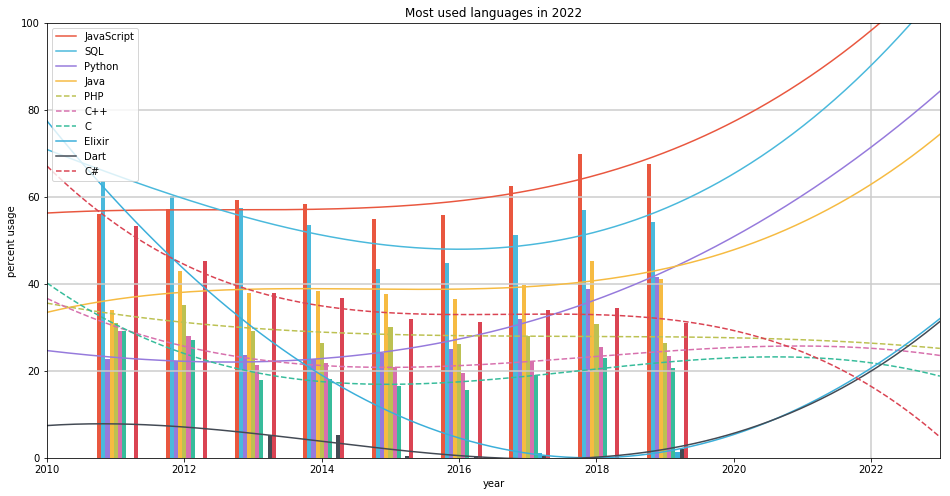

In [0]:
def plot_curves(curves, usage, title='Programming languages', degrees=3):
  # Initialize figure.
  plt.figure(figsize=(16,8))
  axes = plt.gca()
  axes.set_xlim([2010, 2023])
  axes.set_ylim([0, 100])
  
  # Plot a vertical line in 2022.
  plt.axvline(x=2022, color="#cccccc")
  
  # Plot horizontal lines for readability.
  plt.axhline(y=80, color="#cccccc")
  plt.axhline(y=60, color="#cccccc")
  plt.axhline(y=40, color="#cccccc")
  plt.axhline(y=20, color="#cccccc")
  
  colors = ['#DA4453', '#E9573F', '#4AB9DC', '#967ADC', '#F6BB42', '#BCC152', '#D770AD', '#37BC9B', '#3BAFDA', '#434A54']
  index = 0
  for lang in list(curves.index):
    # Define a new line and apply each coéfficient.
    x = np.linspace(2010, 2023, 256, endpoint = True)
    y = x * 0
    for i in range(0, degrees + 1):
      y += curves[i][lang] * x ** i
    y *= 100
    
    index += 1
    color = colors[index % len(colors)]
    width = 0.06
    linetype = '-'
    
    # Mark declining languages with a dashed line.
    if curves[3][lang] < 0:
      linetype = '--'
    
    # Plot the line.
    plt.plot(x, y, linetype, color=color, label=lang)
    
    # Plot the bar.
    offset = width * len(list(curves.index)) / 2
    plt.bar(pd.Series(list(usage.index)) + width * index - offset, usage[lang] * 100, width=width, color=color)
  
  plt.xlabel('year')
  plt.ylabel('percent usage')
  plt.title(title)
  plt.legend(loc='upper left')

  plt.show()

plot_curves(curves.sort_values(by='2022', ascending=False)[0:10], usage, title='Most used languages in 2022')

This function is re-usable and can also be used to plot the fastest declining languages in the long-term. That is the languages with the lowest values for the highest polynomial.

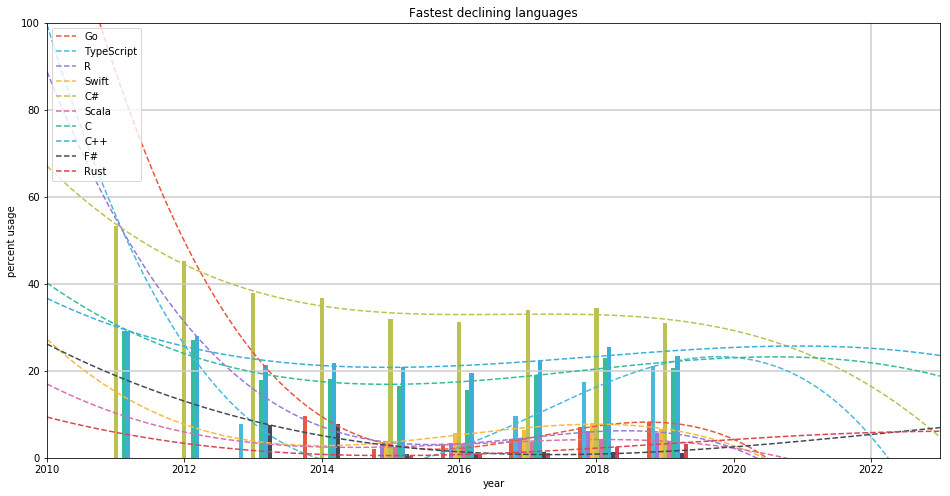

In [0]:
plot_curves(curves.sort_values(by=3, ascending=True)[0:10], usage, title='Fastest declining languages')

# Who is already using the most popular languages from 2022?

This question considers what data can be used to predict if someone is using a popular language or not. More specifically, we want to know who is using it *right now*. Therefore, we use the most recent data for this analysis, which is from 2019 at the time of writing.

We are interested in the features that give the best split between people that use the language and people who don't. But it is not likely we can tell this from a single feature, so we want to take more features into account. A decision tree does this by examining a single feature at a time, always taking the feature that gives the best split. Numerous other methods can be used, but I chose the decision tree because its results can be easily understood.

We will answer this question separately for the top-3 popular languages from 2022, namely JavaScript, SQL, and Python.

## Data preparation

For each of the top-3 popular languages, we add a feature that indicates if this person is using that language. This feature is not available yet in the 2019 dataset since it stores all used languages in a single column.

Additional cleaning is required before we can run a Decision Tree classifier. To simplify our analysis, we drop the columns with multiple values. Also, we have to use one-hot encoding and imputing to prepare the data.

In [0]:
df_clean = df[2019]

# Add using_js column.
df_clean = df_clean.assign(using_JavaScript=df[2019].LanguageWorkedWith.map(lambda item : 1 if 'JavaScript' in item.split(';') else 0))
df_clean = df_clean.assign(using_SQL=df[2019].LanguageWorkedWith.map(lambda item : 1 if 'SQL' in item.split(';') else 0))
df_clean = df_clean.assign(using_Python=df[2019].LanguageWorkedWith.map(lambda item : 1 if 'Python' in item.split(';') else 0))

# Drop columns with >20% missing values.
for attr in df[2019].columns:
  nacount = df_clean[attr].isna().sum()
  napercent = nacount / df_clean.shape[0] * 100
  if napercent > 20:
    df_clean = df_clean.drop(attr, axis=1)

# Drop columns with multiple columns.
df_clean = df_clean.drop(['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'DevEnviron', 'SOVisitTo', 'Ethnicity', 'Gender', 'Sexuality', 'EduOther', 'DevType'], axis=1)

# Drop StackOverflow specific columns we're not particulary interested in.
df_clean = df_clean.drop(['SOVisit1st', 'SOVisitFreq', 'SOFindAnswer', 'SOTimeSaved', 'SOAccount', 'SOPartFreq', 'SOJobs'], axis=1)

# Print the number of rows and cols before one-hot encoding.
print(df_clean.shape)

# Apply one-hot encoding for all columns containing strings.
string_columns = df_clean.columns[df_clean.dtypes == 'object']
df_clean = pd.get_dummies(df_clean, columns=string_columns)

# Use imputer to fill NA's.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imp = pd.DataFrame(imp.fit_transform(df_clean))
df_imp.columns = df_clean.columns
df_imp.index = df_clean.index
df_clean = df_imp

# Print shape after cleaning.
print(df_clean.shape)


(87569, 43)
(87569, 980)


## Modeling

Before applying the Decision Tree classifier, we split the data in a training and test set. The whole set has about 88k rows in no particular order. Use the first 10k as the testing set.

Export the trees as Graphviz (dot) files. We will render them outside this notebook for inspection.
Only print the accuracy score to see how well these trees perform.

Note that we are using a very low depth of 3. This is done for two reasons. First, we want a quick explanation of this model. Its main use is a quick exploration. Second, decision trees are prone to overfitting, which can be avoided by using a low depth.

In [0]:
def classify_language(lang):
  # Build a list of features to test for.
  features = list(filter(lambda value : value != 'using_' + lang, list(df_clean.columns)))

  # Split test and training set.
  X_train = df_clean.iloc[10000:,:][features]
  X_test = df_clean.iloc[:10000,:][features]
  y_train = df_clean.iloc[10000:,][['using_' + lang]]
  y_test = df_clean.iloc[:10000,][['using_' + lang]]

  # Fit decision tree.
  clf = DecisionTreeClassifier(random_state=2019, max_depth=3)
  clf.fit(X_train, y_train)

  # Check accuracy.
  pred = clf.predict(X_test)
  print('Accuracy for {}: {}'.format(lang, accuracy_score(y_test, pred)))

  # Save graph.
  tree.export_graphviz(clf, out_file=root_path + '/using_' + lang + '.dot', feature_names=features)

classify_language('JavaScript')
classify_language('SQL')
classify_language('Python')
  

Accuracy for JavaScript: 0.7026
Accuracy for SQL: 0.6343
Accuracy for Python: 0.6312


# Do programming languages start as a hobby language and get used by professionals later?

Recent surveys ask if the respondent is coding as a hobby.
2015 and 2016 ask for hours per week coding as a hobby. From 2017 on, this has been changed to a yes/no question. It is unknown if people who answered 1 hour per week in 2016 consider themselves a hobby coder when answered as a yes/no question. These results are not directly comparable. For that reason, we only compare 2017 and 2019.

## Data preparation

Build a table that lists the hobby usage in 2017 and 2019, per language. We are interested in the hobby usage relative to the total usage of that language. For example, if 40 out of 80 respondents is using PHP, and 30 out of that 40 is coding as a hobby, then the hobby usage is 75%, or 0.75.

In [0]:
hobbyists = {}
counts_hobby = {}

# Filter out the hobbyists, per year.
hobbyists[2017] = df[2017][df[2017].ProgramHobby != 'No']
hobbyists[2019] = df[2019][df[2019].Hobbyist == 'Yes']

# Build the dataframe.
usage_hobby = pd.DataFrame(index=languages, columns=[2017, 2019], dtype=np.float)

for year in [2017, 2019]:
  counts_hobby = get_counts_multiple(hobbyists[year].reset_index(drop=True))
  for lang in languages:
    if lang in counts_hobby:
      num_hobbyists = counts_hobby[lang] * hobbyists[year].shape[0]
      num_total = usage[lang][year] * df[year].shape[0]
      usage_hobby[year][lang] = num_hobbyists / num_total

# Drop languages that were not included in any of the years.
usage_hobby = usage_hobby.dropna()

usage_hobby.head()

,2017,2019
Java,0.837235,0.816577
JavaScript,0.839825,0.817390
Python,0.887987,0.851220
C++,0.869405,0.853245
C,0.883998,0.857412


## Modeling

We have to calculate the change, per language. Simply subtract the numbers to get the change in absolute percentage and add it to the dataframe.

In [0]:
usage_hobby = usage_hobby.assign(change=usage_hobby[2019] - usage_hobby[2017])

usage_hobby.describe()

,2017,2019,change
count,23.000000,23.000000,23.000000
mean,0.885398,0.849561,-0.035838
std,0.047801,0.035978,0.020393
min,0.795426,0.799891,-0.069489
25%,0.857366,0.822434,-0.050452
50%,0.882353,0.848364,-0.036767
75%,0.932713,0.871286,-0.023313
max,0.980769,0.952756,0.011728


From the summary, we can already see a difference in the means. In 2017, 88.5% of the coders for any particular language code as a hobby. This number drops to 85.0% two years later, in 2019. Fewer hobby coders mean more professional coders. We can plot these results in a histogram of the `changed` column.

Its significance has to be examined using a t-test. We use a paired t-test since it considers samples of the same language.

T-score: 8.42776025495784, p-score: 2.459698547647606e-08, n: 23


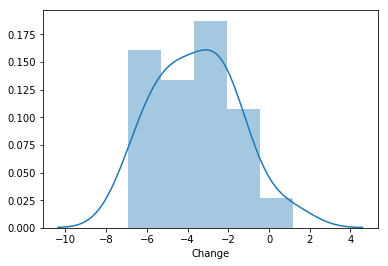

In [0]:
# Plot the histogram.
sns.distplot(pd.Series(usage_hobby.change * 100, name="Change"))

# Print t-test results.
t, p = stats.ttest_rel(list(usage_hobby[2017]), list(usage_hobby[2019]))
print('T-score: {}, p-score: {}, n: {}'.format(t, p, usage_hobby.shape[0]))

$p < 0.01$, which means that this is a statistically significant difference. Therefore, we can claim that languages tend to get used more by professionals later. But this analysis is limited to languages that are already popular, and hence does not consider its early years.